# Grip at The Spark Foundation Intenship

## Task 1 Presdiction using Supervised ML

### Name : Rajjat Rangari

### Dataste : 2 variable (Hours, Score)

### Algorithm : Simple Linear Regression



# Import Reqired Libraries

In [4]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Dataset from url

In [18]:
df = pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Finding correlation between two variables

In [20]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
# find rows, columns and datatype(dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


It is important to always see how many samples have missing values and for which columns.

In [15]:
#checking null value
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [43]:
#sum of all null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [17]:
#shape of dataset
df.shape

(25, 2)

#### Plot the data on 2D graph to show the realation between them

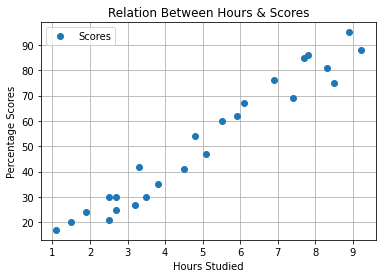

In [51]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Relation Between Hours & Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.grid(True)
plt.show()

### Convert x and y columns to numpy array

In [36]:
x = df.loc[:,['Hours']].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [37]:
y = df.loc[:,['Scores']].values
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

### Train Test and Split the Data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
random_state=0,test_size=0.2)

## Simple Linear Regression

Linear regression models are used to show or predict the relationship between two variables or factors. The factor that is being predicted is called the dependent variable. The factors that are used to predict the value of the dependent variable are called the independent variables. 

In linear regression, each observation consists of two values. One value is for the dependent variable and one value is for the independent variable. In this simple model, a straight line approximates the relationship between the dependent variable and the independent variable. 


### Training the Algorithm

In [58]:
reg = LinearRegression().fit(X_train, y_train)
print('Accuracy of training dataset: {:.2f}'
     .format(reg.score(X_train, y_train)))
print('Accuracy of test dataset: {:.2f}'
     .format(reg.score(X_test, y_test)))

Accuracy of training dataset: 0.95
Accuracy of test dataset: 0.95


When two or more independent variables are used in regression analysis, the model is no longer a simple linear one. This is known as multiple regression

## Ploting the Linear Regression Line

In [60]:
line = reg.coef_*x+reg.intercept_

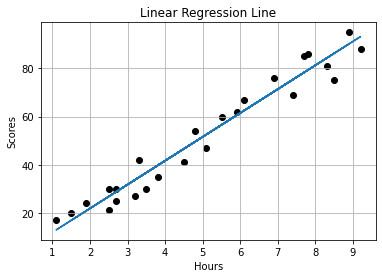

In [73]:
plt.scatter(x,y, color='black')
plt.grid(True)
plt.title('Linear Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(x,line)
plt.show()

## Making Predictions

In [74]:
print('Test Data:\n{}'.format(X_test))
pred=reg.predict(X_test)

Test Data:
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [80]:
data_frame = pd.DataFrame({'Actual Values': y_test.flatten(),
                   'Predicted Values': pred.flatten()})
data_frame

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicted score if a student studies for 9.25hrs/day

In [89]:
pred_score = np.array([9.25])
per = reg.predict(np.array([pred_score]).reshape(-1,1))
print('Predicted Percentage is : {} at {} hrs/day'.format(per[0],pred_score[0]))

Predicted Percentage is : [93.69173249] at 9.25 hrs/day


### Evaluating the model

In [97]:
from sklearn import metrics
print('MEAN ABSOLUTE ERROR is : ',
      metrics.mean_absolute_error(y_test,pred))

MEAN ABSOLUTE ERROR is :  4.183859899002975
